In [1]:
import numpy as np
import pandas as pd
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import tensorflow as tf

In [2]:
files = glob.glob('*.csv')


In [3]:
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

In [4]:
dfs

[                Date/Time  \
 0     Year 1 Jan 01 01:00   
 1     Year 1 Jan 01 02:00   
 2     Year 1 Jan 01 03:00   
 3     Year 1 Jan 01 04:00   
 4     Year 1 Jan 01 05:00   
 ...                   ...   
 8754  Year 1 Dec 31 19:00   
 8755  Year 1 Dec 31 20:00   
 8756  Year 1 Dec 31 21:00   
 8757  Year 1 Dec 31 22:00   
 8758  Year 1 Dec 31 23:00   
 
       [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
 0                                                   0.0        
 1                                                   0.0        
 2                                                   0.0        
 3                                                   0.0        
 4                                                   0.0        
 ...                                                 ...        
 8754                                                0.0        
 8755                                                0.0        
 8756                                                

In [5]:
data=pd.concat(dfs)

In [6]:
data


Date/Time  \
0     Year 1 Jan 01 01:00   
1     Year 1 Jan 01 02:00   
2     Year 1 Jan 01 03:00   
3     Year 1 Jan 01 04:00   
4     Year 1 Jan 01 05:00   
...                   ...   
8754  Year 1 Dec 31 19:00   
8755  Year 1 Dec 31 20:00   
8756  Year 1 Dec 31 21:00   
8757  Year 1 Dec 31 22:00   
8758  Year 1 Dec 31 23:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         21.350   
8755                                         18.375   
8756                                         16.025   
8757                                         14.450   
8758                                         14.025   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                            -12.176278   
8755                            -25.321975   
8756                            -38.737982   
8757                            -52.333160   
8758                            -66.042833   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                      

In [7]:
# data.to_excel("input_data.xlsx") 


In [8]:
data.dtypes

Date/Time                                                  object
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)    float64
[1] Site Direct Solar Radiation Rate per Area  (W/m2)     float64
[1] Site Outdoor Air Dewpoint Temperature  (C)            float64
[1] Site Outdoor Air Drybulb Temperature  (C)             float64
[1] Site Solar Altitude Angle  (deg)                      float64
[1] Site Solar Azimuth Angle  (deg)                       float64
[1] Site Wind Direction  (deg)                            float64
[1] Site Wind Speed  (m/s)                                float64
[1] Surface Outside Face Temperature  (C)                 float64
Orientation                                                 int64
Lats                                                      float64
Longs                                                     float64
[1] Dry Bulb Temperature (C)                              float64
[1] Global Horizontal Radiation (Wh/m2)                     int64
[1] Relati

In [9]:
import pandas as pd

# Assuming data_a0 is your DataFrame
data['Date/Time'] = pd.to_datetime(data['Date/Time'].str.replace('Year 1 ', '2002'), format="%Y%b %d %H:%M")


In [10]:
data

Date/Time  \
0    2002-01-01 01:00:00   
1    2002-01-01 02:00:00   
2    2002-01-01 03:00:00   
3    2002-01-01 04:00:00   
4    2002-01-01 05:00:00   
...                  ...   
8754 2002-12-31 19:00:00   
8755 2002-12-31 20:00:00   
8756 2002-12-31 21:00:00   
8757 2002-12-31 22:00:00   
8758 2002-12-31 23:00:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         21.350   
8755                                         18.375   
8756                                         16.025   
8757                                         14.450   
8758                                         14.025   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                            -12.176278   
8755                            -25.321975   
8756                            -38.737982   
8757                            -52.333160   
8758                            -66.042833   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                               96

In [11]:
data.iloc[50]

Date/Time                                                 2002-01-03 03:00:00
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)                    0.0
[1] Site Direct Solar Radiation Rate per Area  (W/m2)                     0.0
[1] Site Outdoor Air Dewpoint Temperature  (C)                           6.15
[1] Site Outdoor Air Drybulb Temperature  (C)                            11.8
[1] Site Solar Altitude Angle  (deg)                               -62.150707
[1] Site Solar Azimuth Angle  (deg)                                 95.739049
[1] Site Wind Direction  (deg)                                            0.0
[1] Site Wind Speed  (m/s)                                              0.125
[1] Surface Outside Face Temperature  (C)                           17.089917
Orientation                                                                 0
Lats                                                                  23.0225
Longs                                                           

<Axes: >

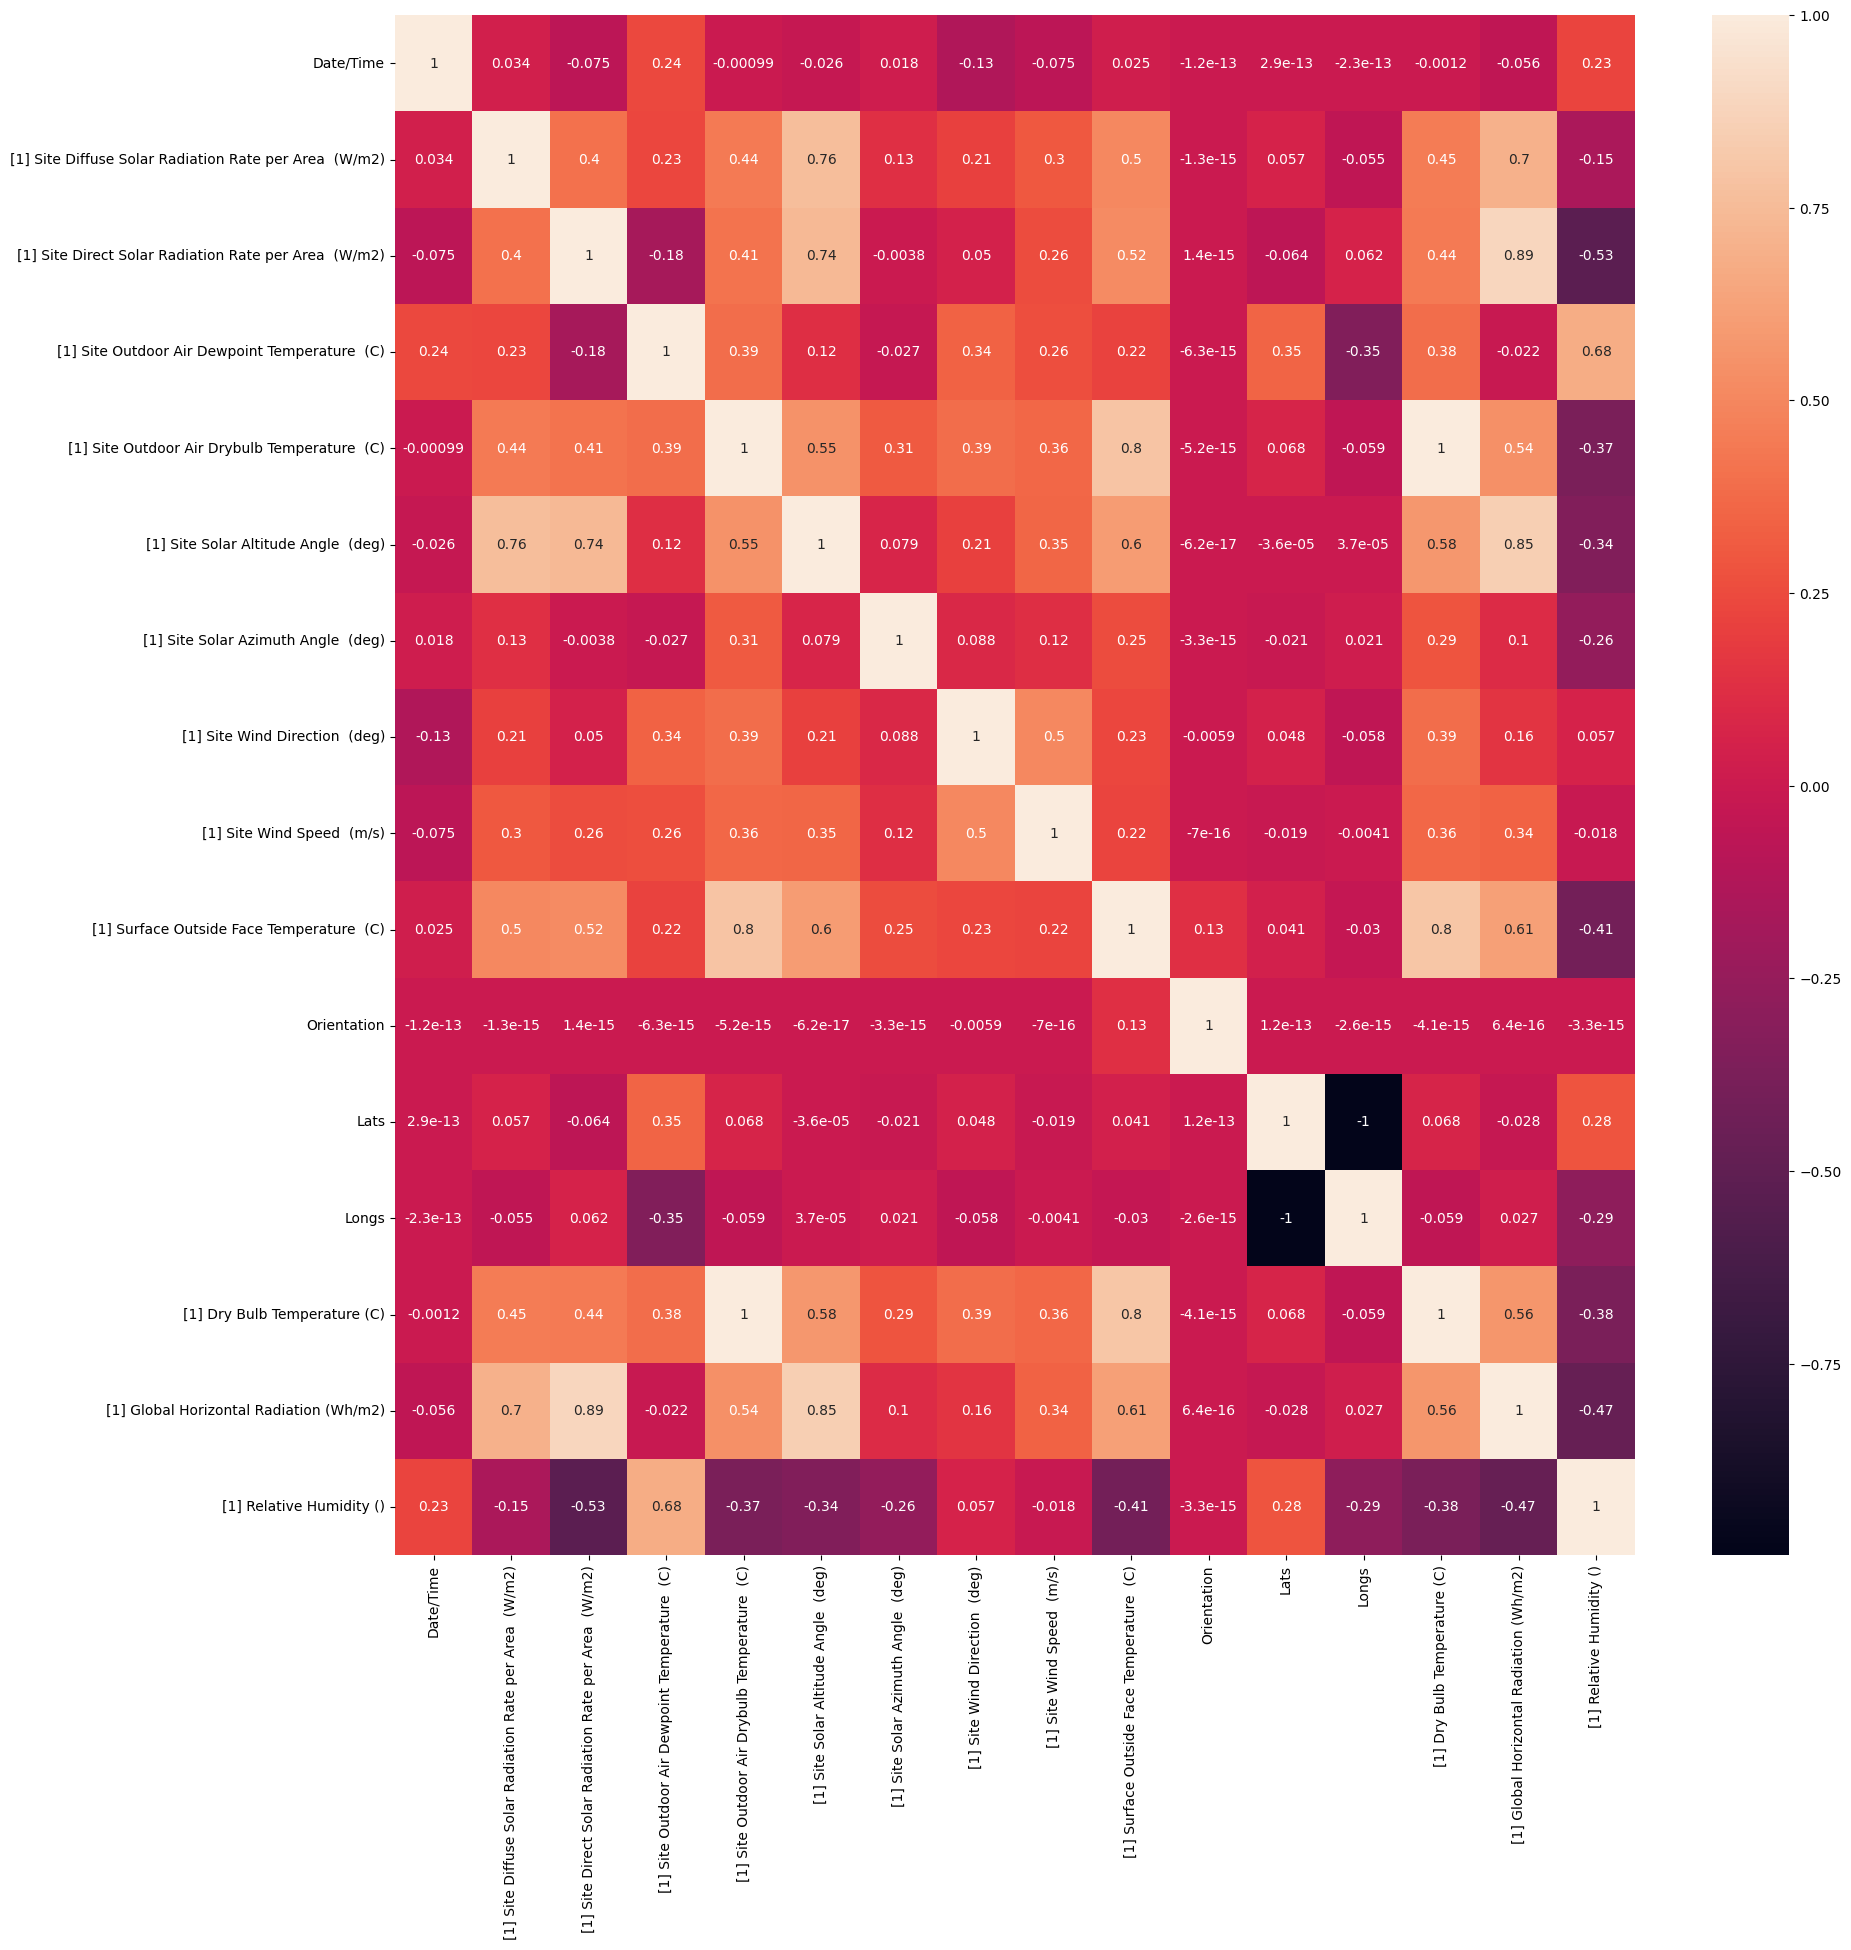

In [12]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)

In [13]:
data.dtypes
# Assuming theta, phi, and h are given angles in radians


Date/Time                                                 datetime64[ns]
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)           float64
[1] Site Direct Solar Radiation Rate per Area  (W/m2)            float64
[1] Site Outdoor Air Dewpoint Temperature  (C)                   float64
[1] Site Outdoor Air Drybulb Temperature  (C)                    float64
[1] Site Solar Altitude Angle  (deg)                             float64
[1] Site Solar Azimuth Angle  (deg)                              float64
[1] Site Wind Direction  (deg)                                   float64
[1] Site Wind Speed  (m/s)                                       float64
[1] Surface Outside Face Temperature  (C)                        float64
Orientation                                                        int64
Lats                                                             float64
Longs                                                            float64
[1] Dry Bulb Temperature (C)                       

In [14]:
%pip install ephem

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
data.columns

Index(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()'],
      dtype='object')

In [16]:
# import math
# import ephem
# import pandas as pd

# def calculate_solar_parameters(data_row):
#     # Set observer's latitude and longitude
#     o.lat, o.long = str(data_row['Lats']), str(data_row['Longs'])

#     # Get the Sun object
#     sun = ephem.Sun()

#     # Calculate sunrise, solar noon, and sunset
#     sunrise = o.previous_rising(sun, start=ephem.now())
#     solar_noon = o.next_transit(sun, start=sunrise)
#     sunset = o.next_setting(sun, start=solar_noon)

#     # Convert ephem.Date to pandas Timestamp
#     solar_noon = pd.to_datetime(solar_noon.datetime())

#     # Determine if the given time is before or after solar noon
#     given_time = data_row['Date/Time']
#     if given_time < solar_noon:
#         hourangle = 2.5 * (abs((given_time - solar_noon).seconds) // 60)
#     else:
#         hourangle = -2.5 * (abs((given_time - solar_noon).seconds) // 60)

#     # Calculate declination
#     N = data_row['N']
#     declination = 23.45 * math.sin(math.radians(360 * (284 + N) / 365))

#     # Get azimuth from the data_row
#     azimuth = data_row['[1] Site Solar Azimuth Angle  (deg)']

#     return declination, hourangle, azimuth

# def calculate_tt(data_row):
#     # Get solar parameters
#     declination, hourangle, azimuth = calculate_solar_parameters(data_row)

#     # Convert angles to radians for trigonometric functions
#     latitude_rad = math.radians(data_row['Lats'])
#     declination_rad = math.radians(declination)
#     hourangle_rad = math.radians(hourangle)
#     azimuth_rad = math.radians(azimuth)

#     # Calculate the cosine of tt using the given formula
#     cos_tt = (
#         -math.cos(latitude_rad) * math.sin(declination_rad) * math.cos(azimuth_rad)
#         + math.sin(latitude_rad) * math.cos(declination_rad) * math.cos(hourangle_rad) * math.cos(azimuth_rad)
#         + math.cos(declination_rad) * math.sin(hourangle_rad) * math.sin(azimuth_rad)
#     )

#     # Calculate tt using the arccosine function
#     tt = cos_tt

#     return tt

# # Assuming your DataFrame is named 'data'
# data['N'] = data['Date/Time'].dt.dayofyear

# # Create an observer
# o = ephem.Observer()

# # Apply the functions to each row of the DataFrame
# data['cos_incident_angle'] = data.apply(calculate_tt, axis=1)

# # Display the result
# print(data[['Date/Time', 'Lats', 'Longs', 'cos_incident_angle']])


In [17]:
import numpy as np
import pandas as pd

# Assuming you have the DataFrame 'data' with the given columns
# Set observer's latitude and longitude
lstm = 15 * 5.5  # Local Standard Time Meridian for India

# Calculate the day of the year from the 'Date/Time' column
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['day'] = data['Date/Time'].dt.dayofyear

# Calculate Equation of Time (EoT)
B = 360 / 365 * (data['day'] - 81)
eot = 9.87 * np.sin(2 * np.radians(B)) - 7.53 * np.cos(np.radians(B)) - 1.5 * np.sin(np.radians(B))

# Calculate Time Correction (TC)
tc = 4 * (data['Longs'] - lstm) + eot

# Convert 'Date/Time' to local time (Local Standard Time, LST)
data['Local Time'] = data['Date/Time'] + pd.to_timedelta(tc, unit='m')

# Calculate Hour Angle (HRA)
data['hra'] = 15 * (data['Local Time'].dt.hour + data['Local Time'].dt.minute / 60 - 12)




In [18]:
data

Date/Time  \
0    2002-01-01 01:00:00   
1    2002-01-01 02:00:00   
2    2002-01-01 03:00:00   
3    2002-01-01 04:00:00   
4    2002-01-01 05:00:00   
...                  ...   
8754 2002-12-31 19:00:00   
8755 2002-12-31 20:00:00   
8756 2002-12-31 21:00:00   
8757 2002-12-31 22:00:00   
8758 2002-12-31 23:00:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         21.350   
8755                                         18.375   
8756                                         16.025   
8757                                         14.450   
8758                                         14.025   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                            -12.176278   
8755                            -25.321975   
8756                            -38.737982   
8757                            -52.333160   
8758                            -66.042833   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                               96

In [19]:

# Assuming data['day'], data['Lats'], data['hra'], and data['[1] Site Solar Altitude Angle  (deg)'] are available

# Calculate declination
day_angle = 360 * (284 + data['day']) / 365
data['declination'] = 23.45 * np.sin(np.radians(day_angle))

# Assuming data['Lats'] represents latitude
latitude = data['Lats']

# Assuming data['hra'] represents hour angle
hour_angle = data['hra']

# Calculate solar zenith angle
data['solar_zenith'] = 90 + data['[1] Site Solar Altitude Angle  (deg)']


In [20]:
data

Date/Time  \
0    2002-01-01 01:00:00   
1    2002-01-01 02:00:00   
2    2002-01-01 03:00:00   
3    2002-01-01 04:00:00   
4    2002-01-01 05:00:00   
...                  ...   
8754 2002-12-31 19:00:00   
8755 2002-12-31 20:00:00   
8756 2002-12-31 21:00:00   
8757 2002-12-31 22:00:00   
8758 2002-12-31 23:00:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         21.350   
8755                                         18.375   
8756                                         16.025   
8757                                         14.450   
8758                                         14.025   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                            -12.176278   
8755                            -25.321975   
8756                            -38.737982   
8757                            -52.333160   
8758                            -66.042833   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                               96

In [21]:


# Define a function to calculate solar azimuth angle for a single row
def calculate_single_solar_azimuth(local_hour, declination, latitude, hra):
    if local_hour < 12:
        return np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))
    else:
        return 360 - np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))

# Vectorized calculation of solar azimuth angle
data['solar_azimuth'] = np.where(data['Local Time'].dt.hour < 12,
                                  np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))),
                                  360 - np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))))


In [22]:
data['Wall Azimuth'] = data['Orientation'].replace({0: 180, 180: 0, 90: 270, 270: 90})

data['AOI'] = np.degrees(np.arccos(np.sin(np.radians(data['solar_zenith'])) * np.cos(np.radians(-data['solar_azimuth']+data['Wall Azimuth']))))


In [23]:
data

Date/Time  \
0    2002-01-01 01:00:00   
1    2002-01-01 02:00:00   
2    2002-01-01 03:00:00   
3    2002-01-01 04:00:00   
4    2002-01-01 05:00:00   
...                  ...   
8754 2002-12-31 19:00:00   
8755 2002-12-31 20:00:00   
8756 2002-12-31 21:00:00   
8757 2002-12-31 22:00:00   
8758 2002-12-31 23:00:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         21.350   
8755                                         18.375   
8756                                         16.025   
8757                                         14.450   
8758                                         14.025   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                            -12.176278   
8755                            -25.321975   
8756                            -38.737982   
8757                            -52.333160   
8758                            -66.042833   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                               96

In [24]:

data['Eb']=data['[1] Global Horizontal Radiation (Wh/m2)']*np.cos(np.radians(data['AOI']))/(np.cos(np.radians(data['solar_zenith'])))
data['Eg']=data['[1] Global Horizontal Radiation (Wh/m2)']*np.cos(np.radians(data['AOI']))

<Axes: >

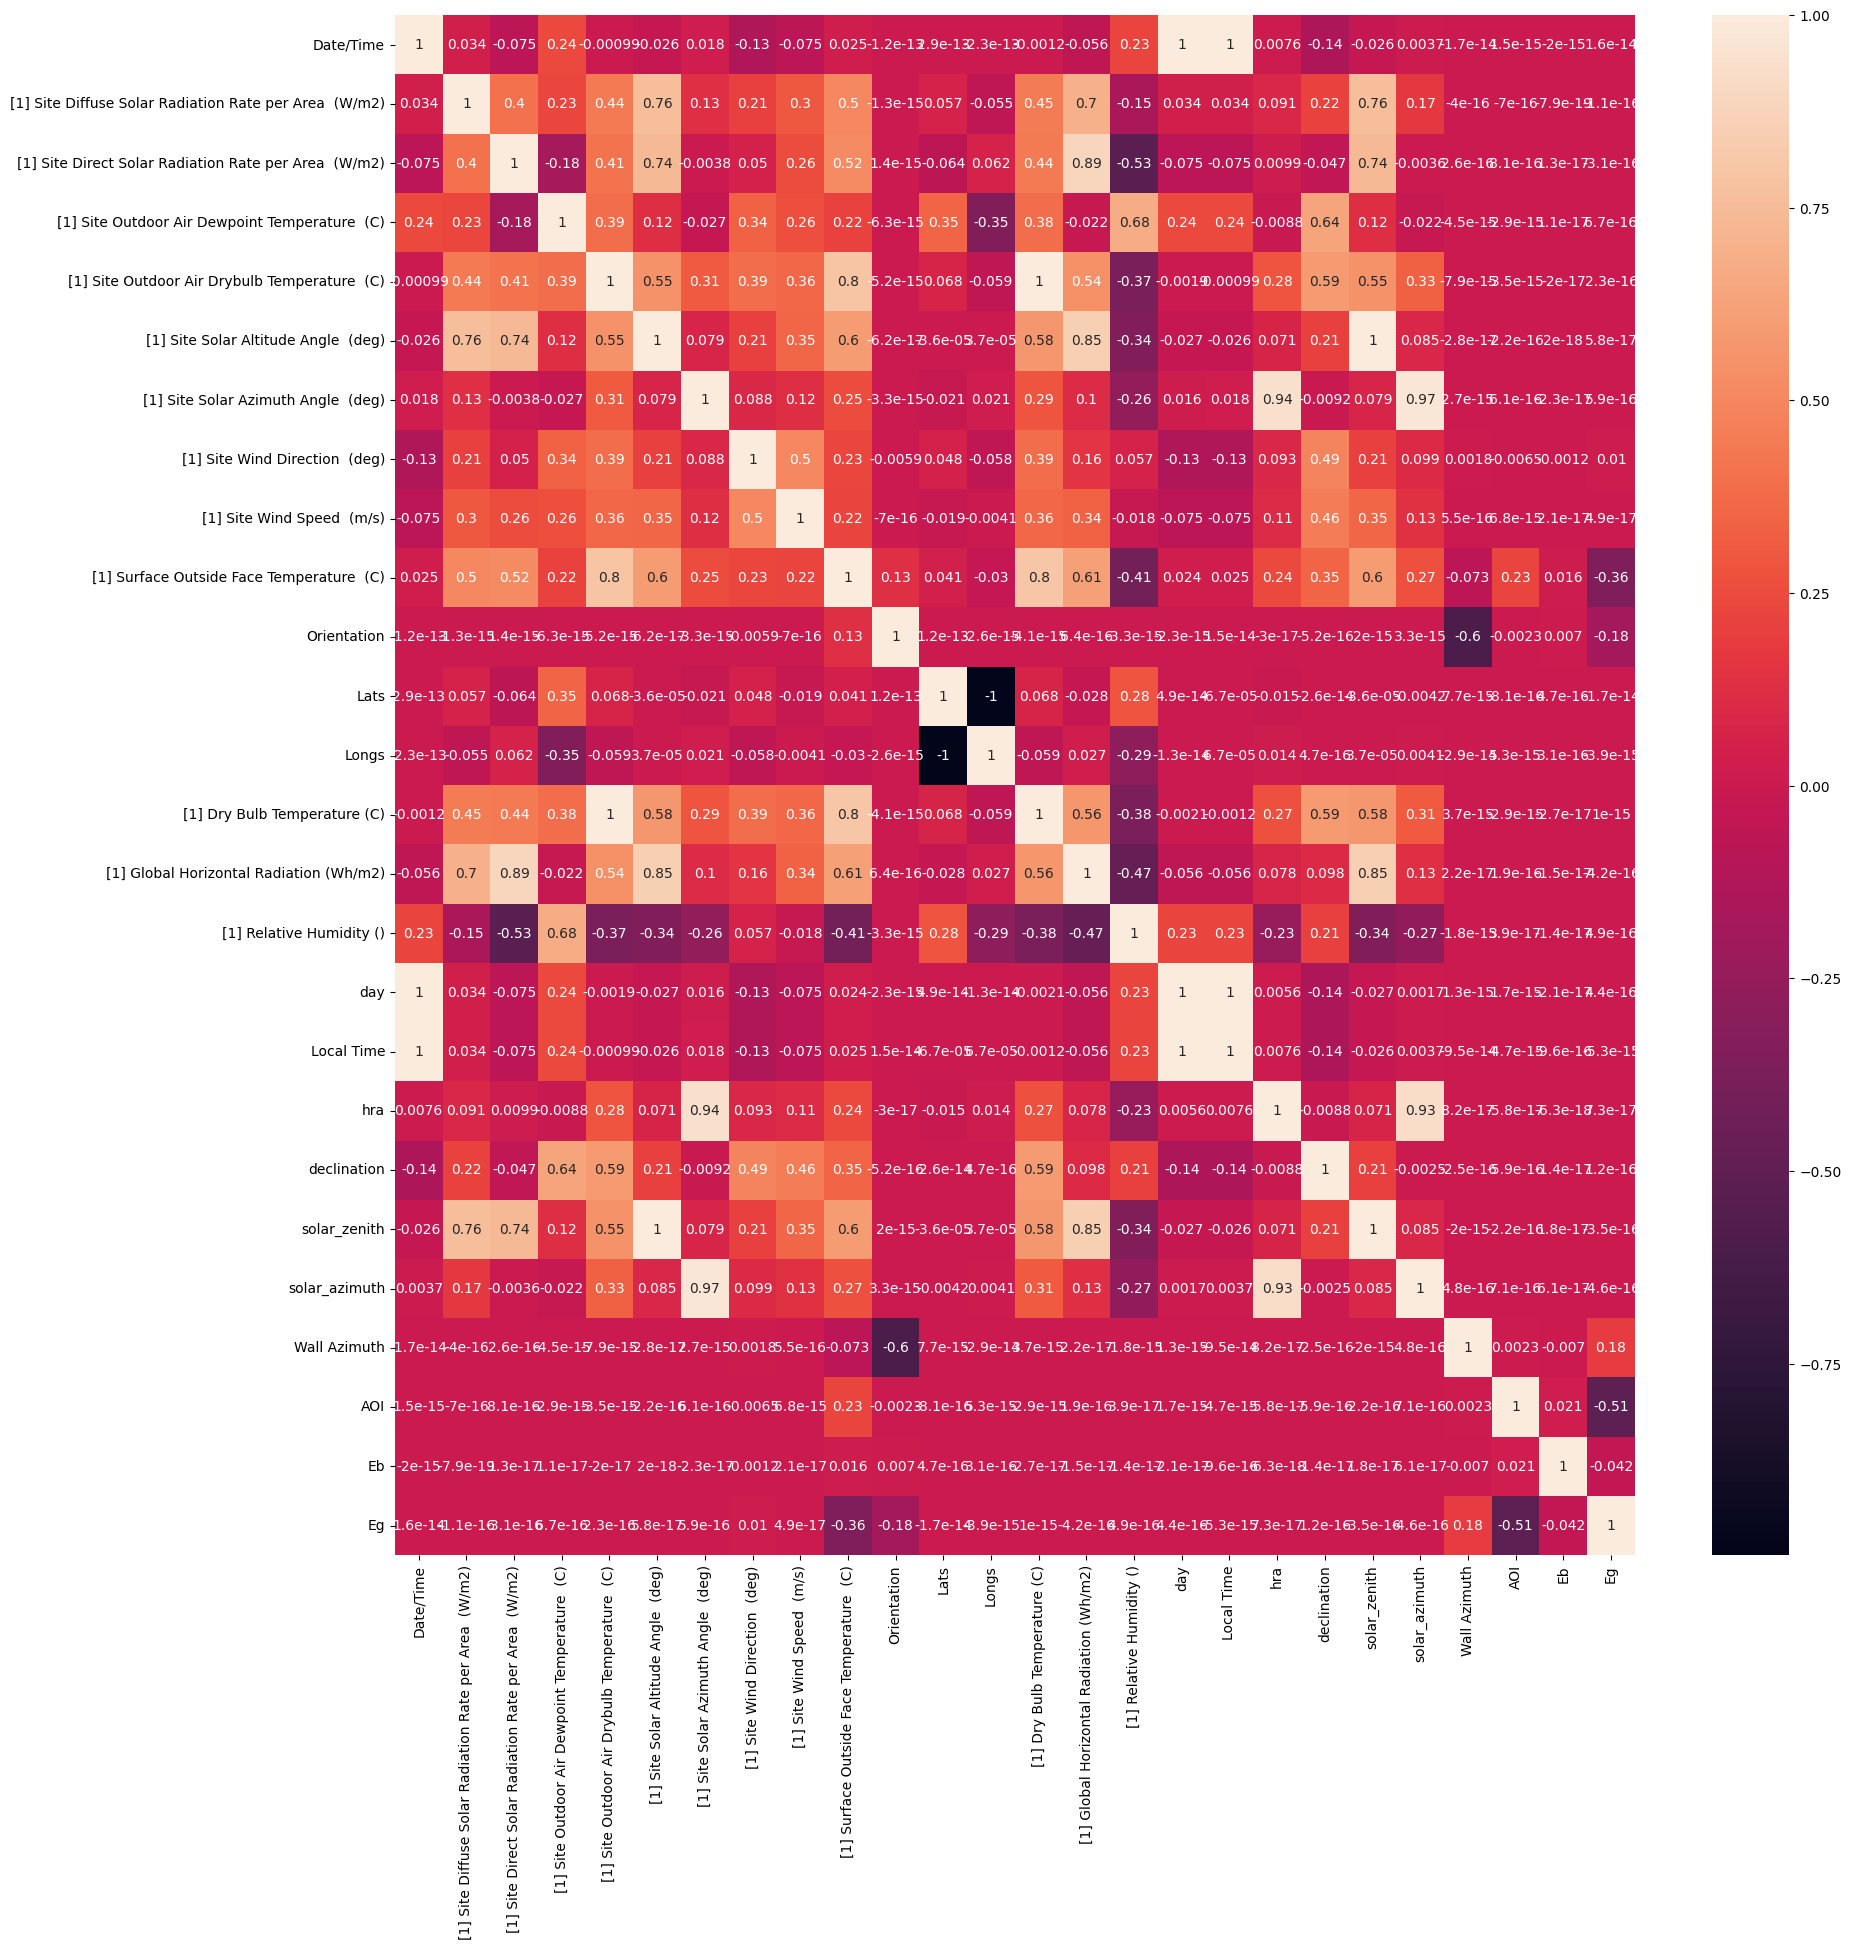

In [25]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)

In [26]:
data.describe()

Date/Time  \
count               105108   
mean   2002-07-02 12:00:00   
min    2002-01-01 01:00:00   
25%    2002-04-02 06:00:00   
50%    2002-07-02 12:00:00   
75%    2002-10-01 18:00:00   
max    2002-12-31 23:00:00   
std                    NaN   

       [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
count                                      105108.000000        
mean                                           78.309396        
min                                             0.000000        
25%                                             0.000000        
50%                                             6.750000        
75%                                           134.000000        
max                                           548.500000        
std                                           113.574154        

       [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
count                                      105108.000000       
mean                                          231.019608       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                           426.000000       
max                                          1100.000000       
std                                           330.532462       

       [1] Site Outdoor Air Dewpoint Temperature  (C)  \
count                                   105108.000000   
mean                                        16.296727   
min                                         -5.900000   
25%                                         10.025000   
50%                                         17.400000   
75%                                         22.925000   
max                                         28.900000   
std                                          7.137327   

       [1] Site Outdoor Air Drybulb Temperature  (C)  \
count                                  105108.000000   
mean                                       25.848619   
min                                        -1.500000   
25%                                        22.300000   
50%                                        26.350000   
75%                                        29.950000   
max                                        43.925000   
std                                         6.171036   

       [1] Site Solar Altitude Angle  (deg)  \
count                         105108.000000   
mean                               0.227428   
min                              -86.550209   
25%                              -37.365723   
50%                                0.247593   
75%                               37.415117   
max                               86.550276   
std                               43.769597   

       [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
count                        105108.000000                    96349.000000   
mean                            174.838904                      169.285802   
min                               4.730277                        0.000000   
25%                              87.134762                       47.750000   
50%                             169.146494                      209.250000   
75%                             267.856319                      265.750000   
max                             347.296505                      358.500000   
std                              97.401449                      112.322566   

       [1] Site Wind Speed  (m/s)  [1] Surface Outside Face Temperature  (C)  \
count               105108.000000                              105108.000000   
mean                     3.751532                                  30.128219   
min                      0.000000                                   9.274649   
25%                      1.500000                                  24.606212   
50%                      3.100000    

In [27]:
data.columns


Index(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'day', 'Local Time', 'hra', 'declination', 'solar_zenith',
       'solar_azimuth', 'Wall Azimuth', 'AOI', 'Eb', 'Eg'],
      dtype='object')

In [28]:
data1 = data[data['Longs'] == 69.6669]
data1

Date/Time  \
0    2002-01-01 01:00:00   
1    2002-01-01 02:00:00   
2    2002-01-01 03:00:00   
3    2002-01-01 04:00:00   
4    2002-01-01 05:00:00   
...                  ...   
8754 2002-12-31 19:00:00   
8755 2002-12-31 20:00:00   
8756 2002-12-31 21:00:00   
8757 2002-12-31 22:00:00   
8758 2002-12-31 23:00:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                             13.050   
1                                             10.075   
2                                              7.950   
3                                              6.900   
4                                             11.125   
...                                              ...   
8754                                          20.125   
8755                                          19.925   
8756                                          19.800   
8757                                          18.825   
8758                                          17.675   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            15.325   
1                                            12.875   
2                                            12.050   
3                                            10.875   
4                                            12.825   
...                                             ...   
8754                                         22.425   
8755                                         21.325   
8756                                         20.775   
8757                                         19.725   
8758                                         18.800   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.464763   
1                               -78.064374   
2                               -64.281058   
3                               -50.562110   
4                               -36.962619   
...                                    ...   
8754                             -7.115260   
8755                            -20.142605   
8756                            -33.483599   
8757                            -47.032735   
8758                            -60.716966   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                              104.954399                           66.00   
1                               95.760116                           22.00   
2                               96

In [29]:
X = data1.drop(['[1] Site Outdoor Air Drybulb Temperature  (C)','[1] Surface Outside Face Temperature  (C)','Local Time','Date/Time','[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)','[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)','[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)','solar_azimuth',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)','Orientation', 'Lats', 'declination','Wall Azimuth','solar_zenith',
       'Longs','[1] Relative Humidity ()','[1] Global Horizontal Radiation (Wh/m2)', 'hra','AOI',
       'day'], axis = 1)
Y = data1['[1] Surface Outside Face Temperature  (C)']
X.columns


Index(['[1] Dry Bulb Temperature (C)', 'Eb', 'Eg'], dtype='object')

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [31]:
reg = LinearRegression().fit(X_train, y_train)

In [32]:
reg.score(X_train, y_train)

0.8047622073966726

In [33]:
weights = reg.coef_

print("Coefficients:", weights)

Coefficients: [ 1.09249841e+00  7.99301635e-06 -1.52819230e-02]


In [34]:
reg.score(X_test, y_test)

0.8082820477748709

In [35]:
# Predict on the test set
y_pred = reg.predict(X_test)

# Create a DataFrame with y_test and y_pred
comparison_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
comparison_df

y_test     y_pred
4861  36.157637  35.566431
7985  27.588673  27.689300
5769  30.165297  27.688975
6824  29.972411  30.776887
8637  21.212142  19.144124
...         ...        ...
1321  19.020135  19.690374
4761  29.714933  30.348708
7959  46.552876  35.986961
5924  28.955656  31.052357
6676  24.383921  24.715866

[7008 rows x 2 columns]

In [36]:
# import matplotlib.pyplot as plt

# # Assuming y_test and y_pred are your actual and predicted values

# # Create a line plot for y_test and y_pred with respect to their index
# plt.plot(y_test.index, y_test, label='Actual')
# plt.plot(y_test.index, y_pred, label='Predicted')

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Values')
# plt.title('Comparison of Actual and Predicted Values')

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()


In [37]:
# import matplotlib.pyplot as plt

# # Assuming y_test and y_pred are your actual and predicted values

# # Subset the index and corresponding values for the range 300 to 400
# index_subset = y_test.index[300:401]
# y_test_subset = y_test.iloc[300:401]
# y_pred_subset = y_pred[300:401]

# # Create a line plot for the subset of y_test and y_pred with respect to their index
# plt.plot(index_subset, y_test_subset, label='Actual')
# plt.plot(index_subset, y_pred_subset, label='Predicted')

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Values')
# plt.title('Comparison of Actual and Predicted Values (Index 300 to 400)')

# # Set x-axis limits
# plt.xlim(300, 400)

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()


In [38]:
# data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] = pd.to_numeric(data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'], errors='coerce')
# data['[1] Site Solar Azimuth Angle  (deg)'] = pd.to_numeric(data['[1] Site Solar Azimuth Angle  (deg)'], errors='coerce')

# data['solar gain'] = data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] * data['cos_incident_angle'] +\
#                      data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] * (1 + np.cos(np.radians(data['[1] Site Solar Azimuth Angle  (deg)'])) / 2)


In [39]:
# data['cos_altitude']=np.cos(np.radians(data['[1] Site Solar Altitude Angle  (deg)']))

In [40]:
# data

In [41]:
# plt.figure(figsize = (20,20))
# sns.heatmap(data.corr(),annot = True)

In [42]:
# plt.scatter(data['[1] Site Wind Speed  (m/s)'],data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'])

In [43]:
# Predict on the test set
y_pred = reg.predict(X_test)

# Create a DataFrame with y_test and y_pred
comparison_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
comparison_df.reset_index(drop=True, inplace=True)
comparison_df

y_test     y_pred
0     36.157637  35.566431
1     27.588673  27.689300
2     30.165297  27.688975
3     29.972411  30.776887
4     21.212142  19.144124
...         ...        ...
7003  19.020135  19.690374
7004  29.714933  30.348708
7005  46.552876  35.986961
7006  28.955656  31.052357
7007  24.383921  24.715866

[7008 rows x 2 columns]

In [44]:
# import matplotlib.pyplot as plt

# # Assuming y_test and y_pred are your actual and predicted values

# # Create a line plot for y_test and y_pred with respect to their index
# plt.plot(y_test.index, y_test, label='Actual')
# plt.plot(y_test.index, y_pred, label='Predicted')

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Values')
# plt.title('Comparison of Actual and Predicted Values')
# plt.xlim(300, 340)

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()


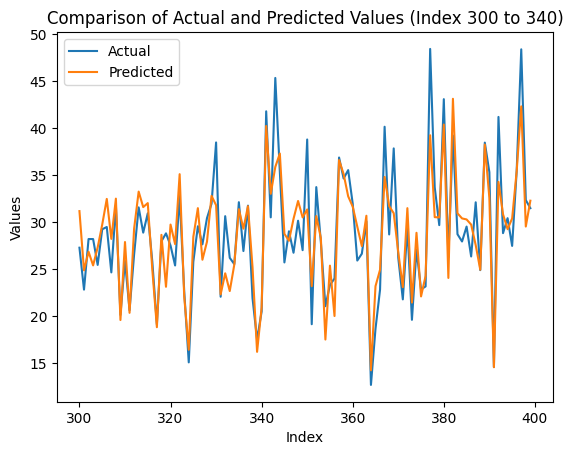

In [45]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values

# Subset the data for the specified index range
index_range = range(300, 400)
y_test_subset = y_test.iloc[index_range]
y_pred_subset = y_pred[index_range]

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot(index_range, y_test_subset, label='Actual')
plt.plot(index_range, y_pred_subset, label='Predicted')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values (Index 300 to 340)')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [46]:
# 

In [47]:
# Predict on the test set
y_predct = reg.predict(X)

# Create a DataFrame with y_test and y_pred
comparison_df_train = pd.DataFrame({'y_simulated': Y, 'y_pred': y_predct})
comparison_df_train

y_simulated     y_pred
0       18.056750  17.614627
1       16.649192  14.664881
2       15.914819  14.446381
3       15.319049  12.807634
4       15.369529  16.194379
...           ...        ...
8754    23.743892  25.699115
8755    22.700892  24.278867
8756    22.314592  23.951117
8757    21.644795  22.530869
8758    21.194156  21.656871

[35036 rows x 2 columns]

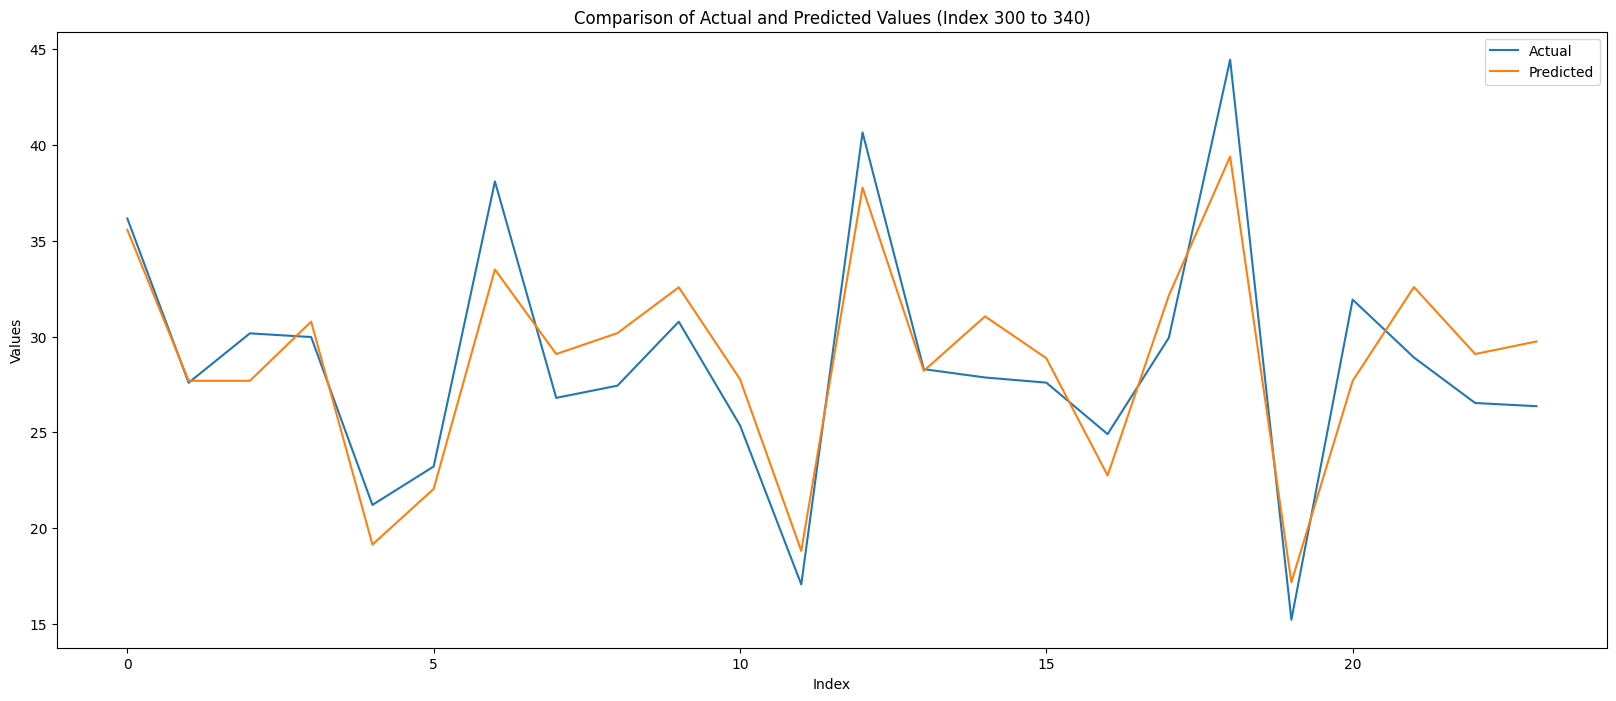

In [48]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
plt.figure(figsize=(20, 8))  
# Subset the data for the specified index range
index_range = range(0, 24)
y_test_subset = y_test.iloc[index_range]
y_pred_subset = y_pred[index_range]

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot(index_range, y_test_subset, label='Actual')
plt.plot(index_range, y_pred_subset, label='Predicted')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values (Index 300 to 340)')

# Add legend
plt.legend()

# Show the plot
plt.show()


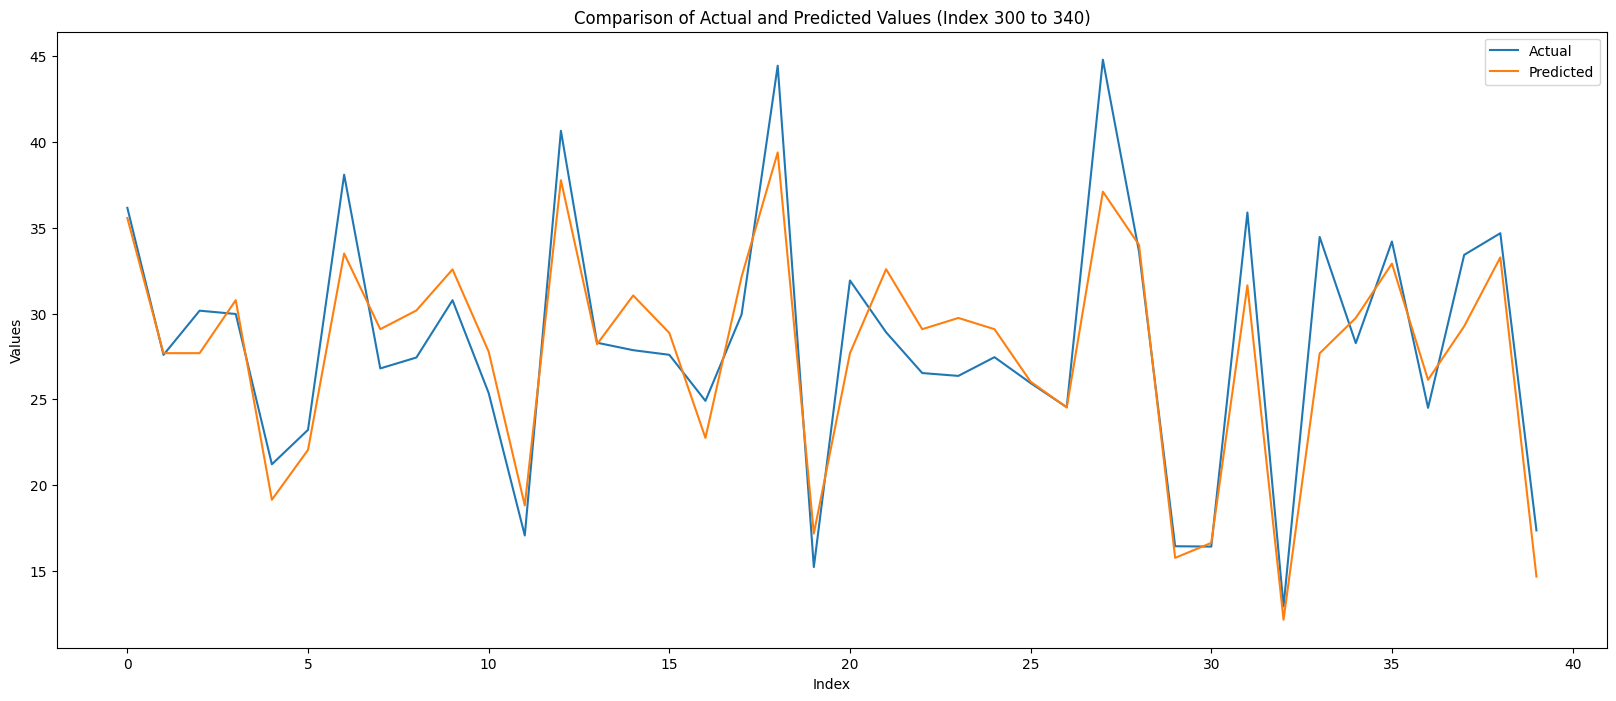

In [49]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
plt.figure(figsize=(20, 8))  
# Subset the data for the specified index range
index_range = range(0,40)
y_test_subset = y_test.iloc[index_range]
y_pred_subset = y_pred[index_range]

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot(index_range, y_test_subset, label='Actual')
plt.plot(index_range, y_pred_subset, label='Predicted')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values (Index 300 to 340)')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [50]:
data

Date/Time  \
0    2002-01-01 01:00:00   
1    2002-01-01 02:00:00   
2    2002-01-01 03:00:00   
3    2002-01-01 04:00:00   
4    2002-01-01 05:00:00   
...                  ...   
8754 2002-12-31 19:00:00   
8755 2002-12-31 20:00:00   
8756 2002-12-31 21:00:00   
8757 2002-12-31 22:00:00   
8758 2002-12-31 23:00:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                           6.325   
8755                                           6.550   
8756                                           7.050   
8757                                           7.575   
8758                                           7.700   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         21.350   
8755                                         18.375   
8756                                         16.025   
8757                                         14.450   
8758                                         14.025   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                            -12.176278   
8755                            -25.321975   
8756                            -38.737982   
8757                            -52.333160   
8758                            -66.042833   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                               96

In [51]:
new_data = data1.drop(['[1] Surface Outside Face Temperature  (C)','Local Time','[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)','[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)','[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)','solar_azimuth',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)', 'declination','Wall Azimuth','solar_zenith',
       'hra','AOI',
       'day'], axis = 1)

In [52]:
new_data

Date/Time  [1] Site Outdoor Air Drybulb Temperature  (C)  \
0    2002-01-01 01:00:00                                         15.325   
1    2002-01-01 02:00:00                                         12.875   
2    2002-01-01 03:00:00                                         12.050   
3    2002-01-01 04:00:00                                         10.875   
4    2002-01-01 05:00:00                                         12.825   
...                  ...                                            ...   
8754 2002-12-31 19:00:00                                         22.425   
8755 2002-12-31 20:00:00                                         21.325   
8756 2002-12-31 21:00:00                                         20.775   
8757 2002-12-31 22:00:00                                         19.725   
8758 2002-12-31 23:00:00                                         18.800   

      Orientation    Lats    Longs  [1] Dry Bulb Temperature (C)  \
0               0  23.242  69.6669                          14.9   
1               0  23.242  69.6669                          12.2   
2               0  23.242  69.6669                          12.0   
3               0  23.242  69.6669                          10.5   
4               0  23.242  69.6669                          13.6   
...           ...     ...      ...                           ...   
8754           90  23.242  69.6669                          22.3   
8755           90  23.242  69.6669                          21.0   
8756           90  23.242  69.6669                          20.7   
8757           90  23.242  69.6669                          19.4   
8758           90  23.242  69.6669                          18.6   

      [1] Global Horizontal Radiation (Wh/m2)  [1] Relative Humidity ()   Eb  \
0                                           0                        85 -0.0   
1                                           0                        83  0.0   
2                                           0                        74  0.0   
3                                           0                        77  0.0   
4                                           0                        94  0.0   
...                                       ...                       ...  ...   
8754                                        0                        88  0.0   
8755                                        0                        93  0.0   
8756                                        0                        95  0.0   
8757                                        0                        95  0.0   
8758                                        0                        93  0.0   

       Eg  
0    -0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
...   ...  
8754  0.0  
8755  0.0  
8756  0.0  
8757  0.0  
8758  0.0  

[35036 rows x 10 columns]

In [53]:
result_df = pd.concat([new_data,comparison_df_train], axis=1) 


In [54]:
result_df

Date/Time  [1] Site Outdoor Air Drybulb Temperature  (C)  \
0    2002-01-01 01:00:00                                         15.325   
1    2002-01-01 02:00:00                                         12.875   
2    2002-01-01 03:00:00                                         12.050   
3    2002-01-01 04:00:00                                         10.875   
4    2002-01-01 05:00:00                                         12.825   
...                  ...                                            ...   
8754 2002-12-31 19:00:00                                         22.425   
8755 2002-12-31 20:00:00                                         21.325   
8756 2002-12-31 21:00:00                                         20.775   
8757 2002-12-31 22:00:00                                         19.725   
8758 2002-12-31 23:00:00                                         18.800   

      Orientation    Lats    Longs  [1] Dry Bulb Temperature (C)  \
0               0  23.242  69.6669                          14.9   
1               0  23.242  69.6669                          12.2   
2               0  23.242  69.6669                          12.0   
3               0  23.242  69.6669                          10.5   
4               0  23.242  69.6669                          13.6   
...           ...     ...      ...                           ...   
8754           90  23.242  69.6669                          22.3   
8755           90  23.242  69.6669                          21.0   
8756           90  23.242  69.6669                          20.7   
8757           90  23.242  69.6669                          19.4   
8758           90  23.242  69.6669                          18.6   

      [1] Global Horizontal Radiation (Wh/m2)  [1] Relative Humidity ()   Eb  \
0                                           0                        85 -0.0   
1                                           0                        83  0.0   
2                                           0                        74  0.0   
3                                           0                        77  0.0   
4                                           0                        94  0.0   
...                                       ...                       ...  ...   
8754                                        0                        88  0.0   
8755                                        0                        93  0.0   
8756                                        0                        95  0.0   
8757                                        0                        95  0.0   
8758                                        0                        93  0.0   

       Eg  y_simulated     y_pred  
0    -0.0    18.056750  17.614627  
1     0.0    16.649192  14.664881  
2     0.0    15.914819  14.446381  
3     0.0    15.319049  12.807634  
4     0.0    15.369529  16.194379  
...   ...          ...        ...  
8754  0.0    23.743892  25.699115  
8755  0.0    22.700892  24.278867  
8756  0.0    22.314592  23.951117  
8757  0.0    21.644795  22.530869  
8758  0.0    21.194156  21.656871  

[35036 rows x 12 columns]

In [55]:
# result_df.to_csv('result.csv', index=False)


In [56]:
# %pip install openpyxl
# result_df.to_excel("result.xlsx") 


In [57]:
# result_df.to_excel("result.xlsx") 


In [58]:
# july_to_sept_data = result_df[ (result_df['Date/Time'].dt.month >= 7) & (result_df['Date/Time'].dt.month <= 9) ]

In [59]:
# july_to_sept_data

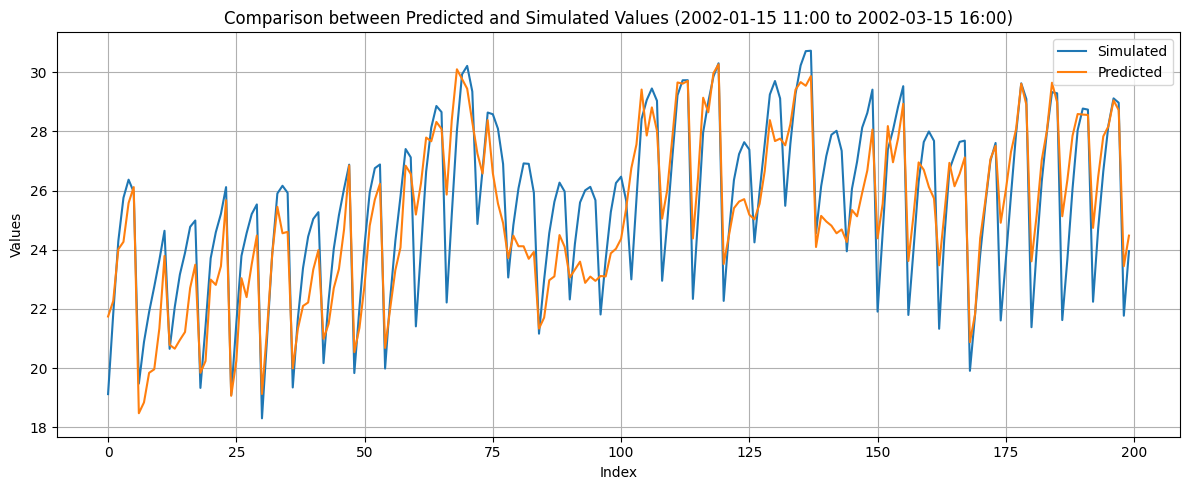

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the data in a DataFrame called result_df
# Ensure the 'Date/Time' column is in datetime format
result_df['Date/Time'] = pd.to_datetime(result_df['Date/Time'])

# Define the range of data you want to plot
start_date = '2002-01-15'
end_date = '2002-03-15'
start_hour = 11 # 8:00 AM
end_hour =16  # 6:00 PM

# Filter the DataFrame to include only the data within the specified date and hour ranges
filtered_data = result_df[
    (result_df['Date/Time'] >= start_date) & (result_df['Date/Time'] <= end_date) &
    (result_df['Date/Time'].dt.hour >= start_hour) & (result_df['Date/Time'].dt.hour <= end_hour)
]

# Define the range of indices you want to plot
index_range = range(0,200)

# Slice the filtered DataFrame using the index range
filtered_data_slice = filtered_data.iloc[index_range]

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(index_range, filtered_data_slice['y_simulated'], label='Simulated')
plt.plot(index_range, filtered_data_slice['y_pred'], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison between Predicted and Simulated Values ({start_date} {start_hour}:00 to {end_date} {end_hour}:00)'.format(start_date=start_date, end_date=end_date, start_hour=start_hour, end_hour=end_hour))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
import pandas as pd

# Set display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns



filtered_data_slice.reset_index(drop=True)

Date/Time  [1] Site Outdoor Air Drybulb Temperature  (C)  \
0    2002-02-24 16:00:00                                         26.600   
1    2002-02-24 17:00:00                                         25.675   
2    2002-02-24 18:00:00                                         24.450   
3    2002-02-24 19:00:00                                         23.650   
4    2002-02-24 20:00:00                                         22.675   
5    2002-02-24 21:00:00                                         22.250   
6    2002-02-24 22:00:00                                         21.375   
7    2002-02-24 23:00:00                                         20.725   
8    2002-02-25 16:00:00                                         32.175   
9    2002-02-25 17:00:00                                         32.500   
10   2002-02-25 18:00:00                                         31.025   
11   2002-02-25 19:00:00                                         29.375   
12   2002-02-25 20:00:00                                         27.050   
13   2002-02-25 21:00:00                                         25.950   
14   2002-02-25 22:00:00                                         24.750   
15   2002-02-25 23:00:00                                         24.250   
16   2002-02-26 16:00:00                                         34.175   
17   2002-02-26 17:00:00                                         33.250   
18   2002-02-26 18:00:00                                         30.900   
19   2002-02-26 19:00:00                                         27.950   
20   2002-02-26 20:00:00                                         24.350   
21   2002-02-26 21:00:00                                         21.600   
22   2002-02-26 22:00:00                                         19.575   
23   2002-02-26 23:00:00                                         19.025   
24   2002-02-27 16:00:00                                         28.525   
25   2002-02-27 17:00:00                                         27.000   
26   2002-02-27 18:00:00                                         25.250   
27   2002-02-27 19:00:00                                         23.375   
28   2002-02-27 20:00:00                                         21.475   
29   2002-02-27 21:00:00                                         19.725   
30   2002-02-27 22:00:00                                         18.325   
31   2002-02-27 23:00:00                                         17.550   
32   2002-02-28 16:00:00                                         28.700   
33   2002-02-28 17:00:00                                         27.650   
34   2002-02-28 18:00:00                                         25.900   
35   2002-02-28 19:00:00                                         24.500   
36   2002-02-28 20:00:00                                         23.300   
37   2002-02-28 21:00:00                                         23.000   
38   2002-02-28 22:00:00                                         22.475   
39   2002-02-28 23:00:00                                         21.775   
40   2002-03-01 16:00:00                                         23.650   
41   2002-03-01 17:00:00                                         22.525   
42   2002-03-01 18:00:00                                         21.600   
43   2002-03-01 19:00:00                                         20.350   
44   2002-03-01 20:00:00                                         19.250   
45   2002-03-01 21:00:00                                         17.950   
46   2002-03-01 22:00:00                                         17.225   
47   2002-03-01 23:00:00                                         17.025   
48   2002-03-02 16:00:00                                         24.750   
49   2002-03-02 17:00:00                                         24.175   
50   2002-03-02 18:00:00                                         23.025   
51   2002-03-02 19:00:00                                         21.425   
52   2002-03-02 20:00:00                